In [80]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import tensorflow as tf
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split

## PROJECT OBJECTIVE: To build a face detection system.

Steps and tasks:

1. Import and Understand the data

A. Import and read ‘images.npy’.

In [81]:
data_1 = np.load('./images.npy',allow_pickle=True)

In [82]:
print(data_1.shape)
print(data_1.size)

(409, 2)
818


In [83]:
images = data_1[:,0]
mask_data = data_1[:,1]

In [84]:
print(images[235].shape)
print(len(mask_data[235]))

(360, 480, 3)
3


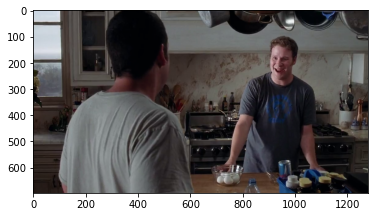

In [85]:
plt.imshow(images[1])

In [86]:
mask_data[1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527},
   {'x': 0.7692307692307693, 'y': 0.36182902584493043}],
  'imageWidth': 1280,
  'imageHeight': 697}]

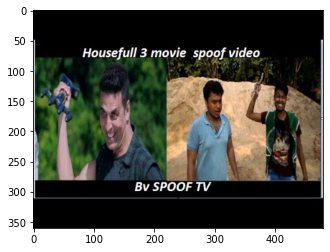

In [87]:
plt.imshow(images[235])

In [88]:
mask_data[235]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.19791666666666666, 'y': 0.33611111111111114},
   {'x': 0.35833333333333334, 'y': 0.6583333333333333}],
  'imageWidth': 480,
  'imageHeight': 360},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5833333333333334, 'y': 0.35},
   {'x': 0.6854166666666667, 'y': 0.48333333333333334}],
  'imageWidth': 480,
  'imageHeight': 360},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.8125, 'y': 0.35},
   {'x': 0.9229166666666667, 'y': 0.5027777777777778}],
  'imageWidth': 480,
  'imageHeight': 360}]

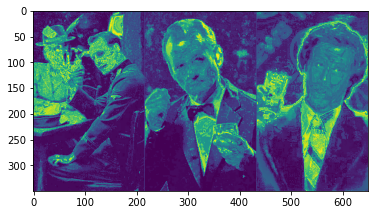

In [89]:
plt.imshow(images[272])

In [90]:
mask_data[272]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7907692307692308, 'y': 0.07428571428571429},
   {'x': 0.9892307692307692, 'y': 0.5771428571428572}],
  'imageWidth': 650,
  'imageHeight': 350},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.3707692307692308, 'y': 0.07428571428571429},
   {'x': 0.5923076923076923, 'y': 0.5028571428571429}],
  'imageWidth': 650,
  'imageHeight': 350},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.15384615384615385, 'y': 0.15142857142857144},
   {'x': 0.2907692307692308, 'y': 0.36857142857142855}],
  'imageWidth': 650,
  'imageHeight': 350},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.013846153846153847, 'y': 0.09142857142857143},
   {'x': 0.1123076923076923, 'y': 0.3314285714285714}],
  'imageWidth': 650,
  'imageHeight': 350}]

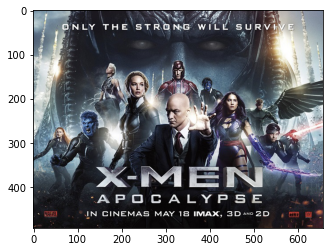

In [91]:
plt.imshow(images[408])

In [92]:
mask_data[408] 

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.3201219512195122, 'y': 0.2839756592292089},
   {'x': 0.4009146341463415, 'y': 0.4198782961460446}],
  'imageWidth': 656,
  'imageHeight': 493},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.4557926829268293, 'y': 0.38742393509127787},
   {'x': 0.5442073170731707, 'y': 0.5618661257606491}],
  'imageWidth': 656,
  'imageHeight': 493},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.6707317073170732, 'y': 0.38336713995943206},
   {'x': 0.7134146341463414, 'y': 0.4746450304259635}],
  'imageWidth': 656,
  'imageHeight': 493},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.16615853658536586, 'y': 0.4665314401622718},
   {'x': 0.22560975609756098, 'y': 0.563894523326572}],
  'imageWidth': 656,
  'imageHeight': 493},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.07164634146341463, 'y': 0.539553752535497},
   {'x': 0.11280487804878049, 'y': 0.5862068965517241}],
  'imageWidth': 656,
  'imageHeight

B. Split the data into Features(X) & labels(Y). Unify shape of all the images.

In [93]:
image_width = 224
image_height = 224

mask_width = 28
mask_height = 28

In [94]:
X_train = np.zeros((int(images.shape[0]), image_height, image_width,3))
y_train = np.zeros((int(mask_data.shape[0]), mask_height, mask_width))

for idx in range(images.shape[0]):
    img = images[idx]
    img = cv2.resize(img, dsize=(image_height, image_width), interpolation=cv2.INTER_CUBIC)
    if len(img.shape)<3:
        img = cv2.merge([img,img,img])
    elif img.shape[2] >3:
        img = img[:,:,:3]
        
    X_train[idx] = preprocess_input(np.array(img, dtype=np.float32))
    for mask in mask_data[idx]:
        x0 = int(mask["points"][0]['x'] * mask_width)
        x1 = int(mask["points"][1]['x'] * mask_width)
        y0 = int(mask["points"][0]['y'] * mask_height)
        y1 = int(mask["points"][1]['y'] * mask_height)
        y_train[idx][y0:y1, x0:x1] = 1

In [95]:
print(X_train.shape)
print(y_train.shape)

(409, 224, 224, 3)
(409, 28, 28)


In [96]:
y_train[1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1

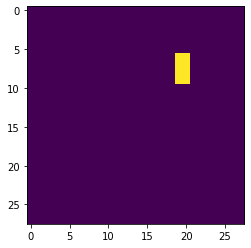

In [97]:
plt.imshow(y_train[1])

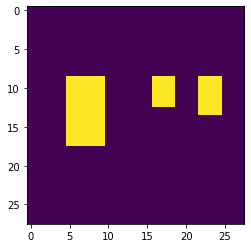

In [98]:
plt.imshow(y_train[235])

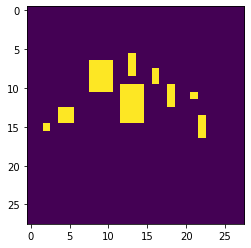

In [99]:
plt.imshow(y_train[408])

In [100]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [101]:
# Design a face mask detection model.

from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

transfer_model = MobileNet(input_shape=(image_height, image_width, 3), include_top=False, alpha=1, weights="imagenet")

for layer in transfer_model.layers:
    layer.trainable = False

block5  = transfer_model.get_layer("conv_pw_5_relu").output
block11 = transfer_model.get_layer("conv_pw_11_relu").output
block13 = transfer_model.get_layer("conv_pw_13_relu").output

x = Concatenate()([UpSampling2D()(block13), block11])
x = Concatenate()([UpSampling2D()(x), block5])

x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
x = Reshape((mask_height, mask_width))(x)

mask_model = Model(inputs=transfer_model.input, outputs=x)

In [102]:
mask_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                           

In [103]:
# Design your own Dice Coefficient and Loss function.

def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

In [104]:
# Train and tune the model as required.

from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.keras.backend.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

In [105]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
mask_model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

In [106]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1)
early_stop = EarlyStopping(monitor="val_loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=1, min_lr=1e-6, verbose=1, mode="min")

In [107]:
mask_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=75, batch_size=32, verbose=1, callbacks=[checkpoint,reduce_lr,early_stop])

Epoch 1/75
9/9 [==============================] - ETA: 0s - loss: 3.0007 - dice_coefficient: 0.2110
Epoch 1: saving model to model-2.72.h5
9/9 [==============================] - 27s 2s/step - loss: 3.0007 - dice_coefficient: 0.2110 - val_loss: 2.7207 - val_dice_coefficient: 0.2106 - lr: 1.0000e-04
Epoch 2/75
9/9 [==============================] - ETA: 0s - loss: 2.6341 - dice_coefficient: 0.2010
Epoch 2: saving model to model-2.46.h5
9/9 [==============================] - 15s 2s/step - loss: 2.6341 - dice_coefficient: 0.2010 - val_loss: 2.4616 - val_dice_coefficient: 0.2001 - lr: 1.0000e-04
Epoch 3/75
9/9 [==============================] - ETA: 0s - loss: 2.4272 - dice_coefficient: 0.1944
Epoch 3: saving model to model-2.33.h5
9/9 [==============================] - 15s 2s/step - loss: 2.4272 - dice_coefficient: 0.1944 - val_loss: 2.3282 - val_dice_coefficient: 0.1951 - lr: 1.0000e-04
Epoch 4/75
9/9 [==============================] - ETA: 0s - loss: 2.3064 - dice_coefficient: 0.1935
Epo

In [108]:
# Evaluate and share insights on performance of the model.

mask_model.evaluate(X_val, y_val)

4/4 [==============================] - 10s 2s/step - loss: 0.8562 - dice_coefficient: 0.5573


[0.8562319278717041, 0.5572806596755981]

In [109]:
unscaled_test_image = cv2.imread('PredictionImage.jpg')

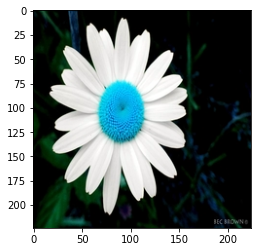

In [110]:
test_image = cv2.resize(unscaled_test_image, dsize=(image_height, image_width), interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)

In [111]:
test_image.shape

(224, 224, 3)

1/1 [==============================] - 1s 1s/step


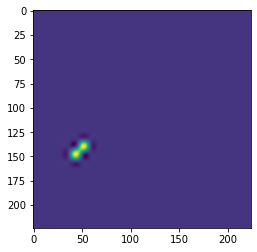

In [112]:
pred_img = mask_model.predict(x=np.array([preprocess_input(np.array(test_image, dtype=np.float32))]))
pred_mask = cv2.resize(1.0*(pred_img[0]> 0.2),dsize=(image_height, image_width), interpolation=cv2.INTER_CUBIC)
plt.imshow(pred_mask)

In [113]:
import zipfile
with zipfile.ZipFile("PINS.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

In [114]:
# Part B

import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('PINS')

In [115]:
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

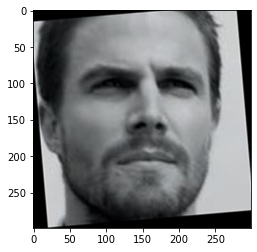

In [116]:
# Check some samples of metadata

img_stph = load_image('./PINS/pins_Stephen Amell/Stephen Amell93.jpg')
plt.imshow(img_stph)

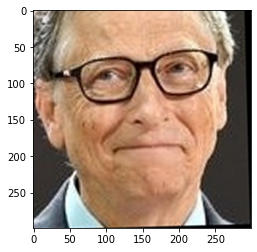

In [117]:
img_bill = load_image('./PINS/pins_bill gates/bill gates52.jpg')
plt.imshow(img_bill)

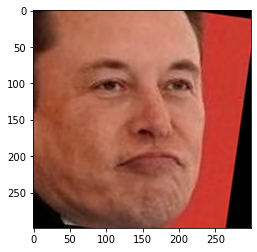

In [118]:
img_elon = load_image('./PINS/pins_elon musk/elon musk25.jpg')
plt.imshow(img_elon)

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = tf.keras.models.Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [120]:
weights_path = './vgg_face_weights.h5'
model = vgg_face()
model.load_weights(weights_path)

In [121]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [122]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 [==============================] - 3s 3s/step
(2622,)


In [123]:
print(embedding_vector[0].shape)
print(embedding_vector[0])

()
0.014231496


In [124]:
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i]=embedding_vector

1/1 [==============================] - 0s 348ms/step


In [125]:
print(embeddings[0].shape)

(2622,)


In [126]:
print(embeddings[53])

[ 0.02104279 -0.00107246  0.0016673  ... -0.01175575  0.01317064
  0.01200332]


In [127]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

In [128]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));

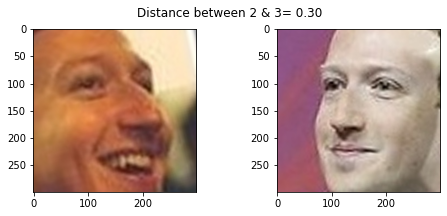

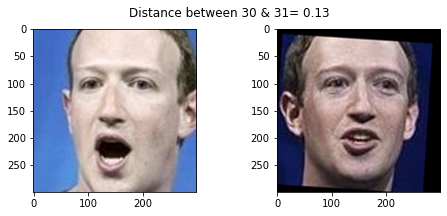

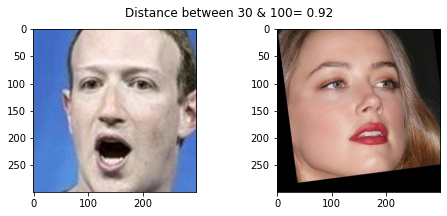

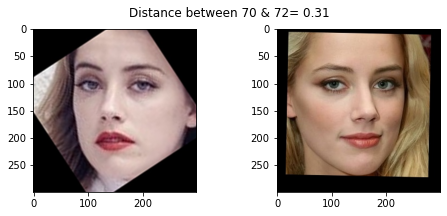

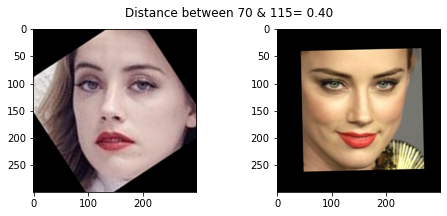

In [129]:
show_pair(2, 3)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

In [130]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]

# another half as test examples of 10 identities
X_test = embeddings[test_idx]
targets = np.array([m.name for m in metadata])

#train labels
y_train = targets[train_idx]

#test labels
y_test = targets[test_idx]

print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (9573,2622)
y_train shape : (9573,)
X_test shape : (1197,2622)
y_test shape : (1197,)


In [131]:
# Transform input labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [132]:
# Scaling input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [133]:
pca = PCA(n_components=2621)
pca.fit(X_train)

PCA(n_components=2621)

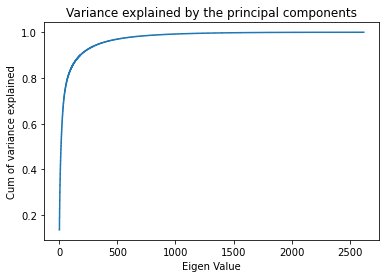

In [134]:
plt.step(list(range(1,2622)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variance explained')
plt.xlabel('Eigen Value')
plt.title('Variance explained by the principal components')
plt.show()

In [135]:
pca = PCA(n_components=200)
Xpca_train = pca.fit_transform(X_train)
Xpca_test = pca.transform(X_test)

In [136]:
svm_clf = svm.SVC()
svm_clf.fit(Xpca_train , y_train)
svm_clf.score(Xpca_test , y_test)

0.9640768588137009

In [137]:
y_predict = svm_clf.predict(Xpca_test)

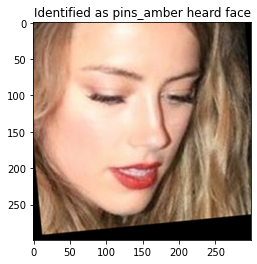

In [138]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity = le.inverse_transform(y_predict)[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

In [139]:
# Get embedding vector for the test image using the pre-trained model
img_1_path = "./Dwayne+Johnson4.jpg"
img_1 = load_image(img_1_path)

img_2_path = "./Benedict+Cumberbatch9.jpg"
img_2 = load_image(img_2_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img_1 = (img_1 / 255.).astype(np.float32)
img_1 = cv2.resize(img_1, dsize = (224,224))
print(img_1.shape)

img_2 = (img_2 / 255.).astype(np.float32)
img_2 = cv2.resize(img_2, dsize = (224,224))
print(img_2.shape)

# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
X_test_img_1 = vgg_face_descriptor.predict(np.expand_dims(img_1, axis=0))[0]
print(X_test_img_1.shape)

X_test_img_2 = vgg_face_descriptor.predict(np.expand_dims(img_2, axis=0))[0]
print(X_test_img_2.shape)

pca = PCA(n_components=200)
Xpca_test_imgs = pca.fit_transform(np.concatenate((X_test, np.reshape(X_test_img_1,(1,X_test_img_1.shape[0])), np.reshape(X_test_img_2,(1,X_test_img_2.shape[0])))))

Xpca_test_img_1 = Xpca_test_imgs[-2,:]
Xpca_test_img_2 = Xpca_test_imgs[-1,:]

[ WARN:0@29759.529] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./Dwayne+Johnson4.jpg'): can't open/read file: check file path/integrity


TypeError: 'NoneType' object is not subscriptable

In [ ]:
test_prediction_1 = svm_clf.predict(scaler.fit_transform(np.reshape(Xpca_test_img_1,(1,Xpca_test_img_1.shape[0]))))
test_identity_1 = le.inverse_transform(test_prediction_1)

plt.imshow(img_1)
plt.title(f'Identified as {test_identity_1}');

In [ ]:
test_prediction_2 = svm_clf.predict(scaler.fit_transform(np.reshape(Xpca_test_img_1,(1,Xpca_test_img_1.shape[0]))))
test_identity_2 = le.inverse_transform(test_prediction_2)

plt.imshow(img_2)
plt.title(f'Identified as {test_identity_2}');